In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 64kB/s 
     |████████████████████████████████| 3.1MB 42.8MB/s 
     |████████████████████████████████| 501kB 63.5MB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class LR(tf.keras.Model):
  def __init__(self,input,output):
    super(LR,self).__init__()
    self.W = tf.Variable(tf.random_normal_initializer()((input,output)))
    self.b = tf.Variable(tf.zeros(output))
    self.params = [self.W,self.b]
  def call(self,inputs):
    return tf.matmul(inputs,self.W)+self.b


In [0]:
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

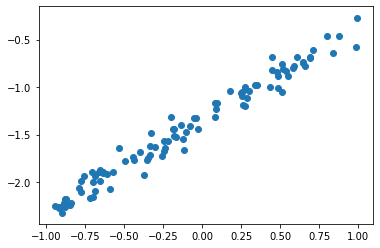

In [6]:
plt.scatter(X,Y)

In [0]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [0]:
def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  return tf.reduce_mean(tf.square(error))

In [0]:
# Gradient function
def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    # calculate the loss
    loss_value = get_loss(model, inputs, targets)
  
  # return gradient
  return tape.gradient(loss_value, model.params)
  

In [28]:
# Create and train the model
model = LR(D, K)

# Print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.07643145]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [0]:
# Store the losses here
losses = []

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
  # Get gradients
  grads = get_grad(model, X, Y)
  
  # Do one step of gradient descent: param <- param - learning_rate * grad
  optimizer.apply_gradients(zip(grads, model.params))
  
  # Store the loss
  loss = get_loss(model, X, Y)
  losses.append(loss)

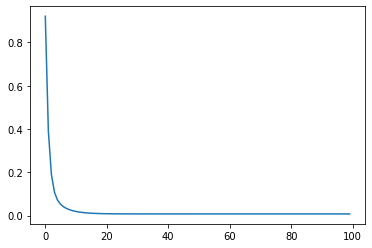

In [18]:
plt.plot(losses)

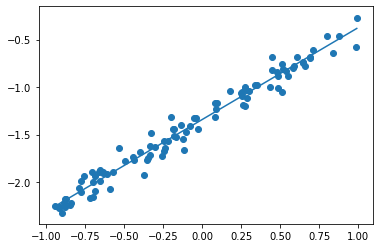

In [19]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1, 1)).flatten()

plt.scatter(X, Y)
plt.plot(x_axis, y_axis)



In [20]:
print("Predicted params:")
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.96687704]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.3418789], dtype=float32)>


In [21]:
print("True params:")
w, b

True params:


(array([[0.98776956]]), -1.319445203809204)